# Car_price_prediction_using_ML2

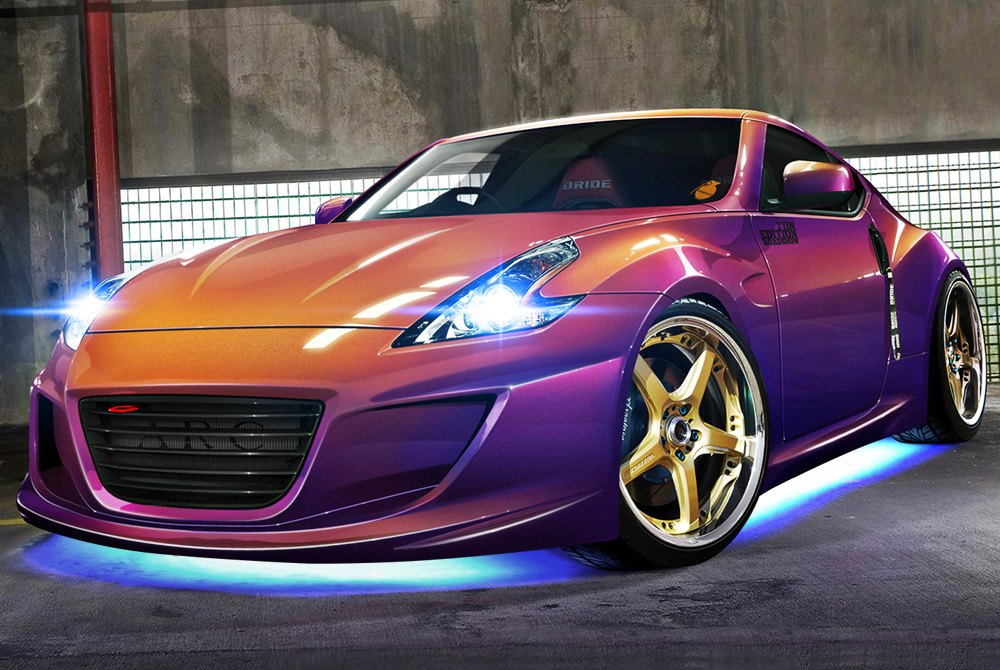

### Import & Analyze Data

In [32]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import gc

In [9]:
df_train = pd.read_hdf("df.train.new.h5")

df_test = pd.read_hdf("df.test.h5")

print(df_train.shape, df_test.shape)

(80129, 10) (80129, 7)


In [11]:
df_train['price_value'] = df_train['price_value'].str.replace(" ", "").str.replace(",", ".").astype(float)
df_train['price_value']

7        63900.000
10       41900.000
11       17950.000
14       38000.000
16       21900.000
            ...   
160252   22800.000
160253   29900.000
160255   42500.000
160256    4900.000
160257   46000.000
Name: price_value, Length: 80129, dtype: float64

In [12]:
df_train[ df_train["price_value"] > 3000_000 ]

,id,price_details,price_value,price_currency,features,seller_name,seller_type,seller_address,breadcrumb,offer_params
106447,106447,Cena Brutto,9999999999999.000,PLN,"[ABS, Elektrycznie ustawiane lusterka, Poduszk...",None,Osoba prywatna,"Lubań, lubański, Dolnośląskie","[Osobowe, Honda, Jazz, Honda Jazz IV (2015-)]","{'Pojemność skokowa': '9 999 cm3', 'Model poja..."


In [13]:
df_train = df_train[ df_train.index != 106447 ]

In [14]:
df = pd.concat([df_train, df_test])
df.shape

(160257, 10)

In [15]:
df.sample(5)

,id,price_details,price_value,price_currency,features,seller_name,seller_type,seller_address,breadcrumb,offer_params
62695,62695,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Celestynów, otwocki, Mazowieckie","[Osobowe, Ford, Grand C-MAX]","{'Kolor': 'Niebieski', 'Model pojazdu': 'Grand..."
29321,29321,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",Centrum Motoryzacyjne Toruńska,Dealer,"Krasnobrodzka 5 - 03-214 Warszawa, Mazowieckie...","[Osobowe, Fiat, Panda, Fiat Panda III (2011-)]","{'Pojemność skokowa': '1 242 cm3', 'Model poja..."
21915,21915,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Szklarska Poręba, jeleniogórski, Dolnośląskie","[Osobowe, Volkswagen, Touran, Volkswagen Toura...","{'Pojemność skokowa': '2 000 cm3', 'Model poja..."
16501,16501,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",SAMOCHODY Z POLSKIEGO SALONU Z GWARANCJĄ,Dealer,"Elizówka 46A - 21-003 Lublin, Lubelskie (Polska)","[Osobowe, Hyundai, I30, Hyundai I30 II (2012-)]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ..."
72031,72031,NaN,NaN,NaN,"[ABS, Elektrycznie ustawiane lusterka, Poduszk...",AUTOHAUS OTTO AUTORYZOWANY DEALER VW,Dealer,"ul. Piasecka 16 - 21-040 Świdnik, świdnicki, L...","[Osobowe, Volkswagen, Polo, Volkswagen Polo V ...","{'Pojemność skokowa': '1 000 cm3', 'Model poja..."


In [16]:
df["offer_params"].head().apply(pd.Series)

,Bezwypadkowy,Liczba miejsc,Kraj pochodzenia,Pojemność skokowa,Rodzaj paliwa,Skrzynia biegów,Możliwość finansowania,Pierwszy właściciel,Oferta od,Liczba drzwi,...,Leasing,Rok produkcji,Marka pojazdu,Faktura VAT,Pierwsza rejestracja,Zarejestrowany w Polsce,VAT marża,Wersja,VIN,Perłowy
7,Tak,5,Polska,1 199 cm3,Benzyna,Manualna,Tak,Tak,Firmy,5,...,Tak,2017,Citroën,Tak,15 listopad 2017,Tak,NaN,NaN,NaN,NaN
10,NaN,5,Polska,1 598 cm3,Benzyna,Automatyczna bezstopniowa (CVT),Tak,Tak,Firmy,5,...,NaN,2012,Nissan,NaN,15 czerwiec 2012,Tak,Tak,NaN,NaN,NaN
11,Tak,5,Niemcy,1 364 cm3,Benzyna,Manualna,NaN,Tak,Firmy,3,...,NaN,2008,Opel,NaN,NaN,NaN,Tak,H (2004-2014),W0L0AHL0885059779,NaN
14,NaN,5,Niemcy,1 798 cm3,Benzyna,Manualna,NaN,NaN,Osoby prywatnej,5,...,NaN,2008,Audi,NaN,7 marzec 2008,Tak,NaN,B8 (2007-2015),WAUZZZ8K58A023087,Tak
16,Tak,5,Niemcy,1 250 cm3,Benzyna,Manualna,NaN,NaN,Osoby prywatnej,5,...,NaN,2010,Ford,NaN,NaN,NaN,Tak,Mk7 (2008-),NaN,NaN


In [18]:
params = df["offer_params"].apply(pd.Series)
params = params.fillna(-1)
params

,Bezwypadkowy,Liczba miejsc,Kraj pochodzenia,Pojemność skokowa,Rodzaj paliwa,Skrzynia biegów,Możliwość finansowania,Pierwszy właściciel,Oferta od,Liczba drzwi,...,First registration,Pearl,Zarejestrowany jako zabytek,VAT free,Engine Code,Particle filter,Leasing concession,Damaged,CO2 emissions,Monthly payment value
7,Tak,5,Polska,1 199 cm3,Benzyna,Manualna,Tak,Tak,Firmy,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
10,-1,5,Polska,1 598 cm3,Benzyna,Automatyczna bezstopniowa (CVT),Tak,Tak,Firmy,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11,Tak,5,Niemcy,1 364 cm3,Benzyna,Manualna,-1,Tak,Firmy,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
14,-1,5,Niemcy,1 798 cm3,Benzyna,Manualna,-1,-1,Osoby prywatnej,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
16,Tak,5,Niemcy,1 250 cm3,Benzyna,Manualna,-1,-1,Osoby prywatnej,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160245,-1,-1,-1,2 000 cm3,Diesel,"Automatyczna dwusprzęgłowa (DCT, DSG)",-1,-1,Osoby prywatnej,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
160246,-1,4,Dania,998 cm3,Benzyna,Manualna,-1,Tak,Firmy,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
160247,Tak,5,Niemcy,1 600 cm3,Benzyna,Manualna,Tak,Tak,Firmy,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
160251,-1,5,Francja,1 560 cm3,Diesel,Manualna,-1,-1,Osoby prywatnej,5,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [19]:
if "Bezwypadkowy" not in df:
    df = pd.concat([df, params], axis=1)
df.shape

(160257, 86)

In [20]:
ru_params = ["Безаварийный", "Количество мест", "Страна происхождения",
       "Объем", "Тип топлива", "Коробка передач",
       "Кредит", "Первый владелец", "Предложение от",
       "Количество дверей", "Пробег", "Мощность", "Металлик", "Тип", "Цвет",
       "Модель автомобиля", "Состояние", "Категория", "Обслуживание в сервисном центре", "Привод",
       "Лизинг", "Год выпуска", "Марка автомобиля", "Счет-фактура по НДС",
       "Первая регистрация", "Зарегистрировано в Польше", "Маржа НДС",
       "Версия", "VIN", "Перламутр", "Поврежденный", "Код двигателя",
       "Сажевый фильтр", "Выбросы CO2", "Ежемесячный платеж",
       "Количество оставшихся платежей", "Первоначальный платеж", "Сумма погашения",
       "Акрил (неметаллический)", "Тюнинг", "Правый руль (английский)",
       "Допуск грузовика"]


dict_params = {pl:ru for pl,ru in zip(params.columns, ru_params)}
dict_params

{'Bezwypadkowy': 'Безаварийный',
 'Liczba miejsc': 'Количество мест',
 'Kraj pochodzenia': 'Страна происхождения',
 'Pojemność skokowa': 'Объем',
 'Rodzaj paliwa': 'Тип топлива',
 'Skrzynia biegów': 'Коробка передач',
 'Możliwość finansowania': 'Кредит',
 'Pierwszy właściciel': 'Первый владелец',
 'Oferta od': 'Предложение от',
 'Liczba drzwi': 'Количество дверей',
 'Przebieg': 'Пробег',
 'Moc': 'Мощность',
 'Metalik': 'Металлик',
 'Typ': 'Тип',
 'Kolor': 'Цвет',
 'Model pojazdu': 'Модель автомобиля',
 'Stan': 'Состояние',
 'Kategoria': 'Категория',
 'Serwisowany w ASO': 'Обслуживание в сервисном центре',
 'Napęd': 'Привод',
 'Leasing': 'Лизинг',
 'Rok produkcji': 'Год выпуска',
 'Marka pojazdu': 'Марка автомобиля',
 'Faktura VAT': 'Счет-фактура по НДС',
 'Pierwsza rejestracja': 'Первая регистрация',
 'Zarejestrowany w Polsce': 'Зарегистрировано в Польше',
 'VAT marża': 'Маржа НДС',
 'Wersja': 'Версия',
 'VIN': 'VIN',
 'Perłowy': 'Перламутр',
 'Uszkodzony': 'Поврежденный',
 'Kod Silnik

In [21]:
df.columns

Index(['id', 'price_details', 'price_value', 'price_currency', 'features',
       'seller_name', 'seller_type', 'seller_address', 'breadcrumb',
       'offer_params', 'Bezwypadkowy', 'Liczba miejsc', 'Kraj pochodzenia',
       'Pojemność skokowa', 'Rodzaj paliwa', 'Skrzynia biegów',
       'Możliwość finansowania', 'Pierwszy właściciel', 'Oferta od',
       'Liczba drzwi', 'Przebieg', 'Moc', 'Metalik', 'Typ', 'Kolor',
       'Model pojazdu', 'Stan', 'Kategoria', 'Serwisowany w ASO', 'Napęd',
       'Leasing', 'Rok produkcji', 'Marka pojazdu', 'Faktura VAT',
       'Pierwsza rejestracja', 'Zarejestrowany w Polsce', 'VAT marża',
       'Wersja', 'VIN', 'Perłowy', 'Uszkodzony', 'Kod Silnika',
       'Filtr cząstek stałych', 'Emisja CO2', 'Miesięczna rata',
       'Liczba pozostałych rat', 'Opłata początkowa', 'Wartość wykupu',
       'Akryl (niemetalizowany)', 'Tuning', 'Kierownica po prawej (Anglik)',
       'Homologacja ciężarowa', 'Make', 'Metallic', 'Engine capacity',
       'Version'

In [22]:
df.rename(columns=dict_params, inplace=True)
df

,id,price_details,price_value,price_currency,features,seller_name,seller_type,seller_address,breadcrumb,offer_params,...,First registration,Pearl,Zarejestrowany jako zabytek,VAT free,Engine Code,Particle filter,Leasing concession,Damaged,CO2 emissions,Monthly payment value
7,7,"Cena Brutto, Faktura VAT",63900.000,PLN,"[ABS, Elektrycznie ustawiane lusterka, Poduszk...",TRANS-AUTO SP. Z O.O. DEALER MARKI ...,Dealer,"ŁUKASIEWICZA 1 - 19-300 Ełk, ełcki, Warmińsko-...","[Osobowe, Citroën, C4 Cactus]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
10,10,Cena Brutto,41900.000,PLN,"[ABS, ASR (kontrola trakcji), Elektryczne szyb...",DECAR - RENAULT i DACIA,Dealer,"MODLIŃSKA 154 B - 03-170 Warszawa, Mazowieckie...","[Osobowe, Nissan, Juke]","{'Kolor': 'Czarny', 'Model pojazdu': 'Juke', '...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11,11,"Cena Brutto, Do negocjacji",17950.000,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",SKUP SPRZEDAŻ ZAMIANA RATY,Dealer,"Ruchocinek 63c - 62-230 Witkowo, gnieźnieński,...","[Osobowe, Opel, Astra, Opel Astra H (2004-2014)]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
14,14,"Cena Brutto, Do negocjacji",38000.000,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Chróścice, opolski, Opolskie","[Osobowe, Audi, A4, Audi A4 B8 (2007-2015)]","{'Liczba miejsc': '5', 'Kraj pochodzenia': 'Ni...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
16,16,Cena Brutto,21900.000,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Trzeboszowice, nyski, Opolskie","[Osobowe, Ford, Fiesta, Ford Fiesta Mk7 (2008-)]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160245,160245,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Leszno, Wielkopolskie","[Osobowe, Volkswagen, Passat, Volkswagen Passa...","{'Pojemność skokowa': '2 000 cm3', 'Model poja...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
160246,160246,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",PTUH Adam Dudziak,Dealer,"Zieleniewo, ulica Szczecińska 59 - 78-100 Ziel...","[Osobowe, Citroën, C1, Citroën C1 II (2014-)]","{'Liczba miejsc': '4', 'Kraj pochodzenia': 'Da...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
160247,160247,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",R-CAR RAFAŁ ŻYWIŃSKI,Dealer,"ul.Krakowska 259A - 43-300 Bielsko-Biała, Śląs...","[Osobowe, Opel, Meriva, Opel Meriva I (2002-20...","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
160251,160251,NaN,NaN,NaN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Toruń, Kujawsko-pomorskie","[Osobowe, Peugeot, 207]","{'Liczba miejsc': '5', 'Model pojazdu': '207',...",...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [23]:
feats_nunique = {feat:df[feat].nunique() for feat in ru_params}
feats_nunique

{'Безаварийный': 2,
 'Количество мест': 10,
 'Страна происхождения': 36,
 'Объем': 1429,
 'Тип топлива': 9,
 'Коробка передач': 6,
 'Кредит': 2,
 'Первый владелец': 2,
 'Предложение от': 2,
 'Количество дверей': 11,
 'Пробег': 33496,
 'Мощность': 612,
 'Металлик': 3,
 'Тип': 21,
 'Цвет': 15,
 'Модель автомобиля': 1047,
 'Состояние': 2,
 'Категория': 1,
 'Обслуживание в сервисном центре': 2,
 'Привод': 6,
 'Лизинг': 2,
 'Год выпуска': 82,
 'Марка автомобиля': 102,
 'Счет-фактура по НДС': 2,
 'Первая регистрация': 8114,
 'Зарегистрировано в Польше': 2,
 'Маржа НДС': 2,
 'Версия': 523,
 'VIN': 35237,
 'Перламутр': 2,
 'Поврежденный': 2,
 'Код двигателя': 239,
 'Сажевый фильтр': 2,
 'Выбросы CO2': 218,
 'Ежемесячный платеж': 534,
 'Количество оставшихся платежей': 70,
 'Первоначальный платеж': 259,
 'Сумма погашения': 355,
 'Акрил (неметаллический)': 3,
 'Тюнинг': 2,
 'Правый руль (английский)': 2,
 'Допуск грузовика': 2}

In [24]:
obj_feats = df.select_dtypes(object).columns

for feat in tqdm(obj_feats):
    some_value = df[feat].values[0]
    if isinstance(some_value, list): continue
    if isinstance(some_value, dict): continue
    if "price" in feat: continue
        
    df["{}_cat".format(feat)] = df[feat].factorize()[0]
    
cat_feats = [x for x in df.columns if "_cat" in x]
cat_feats

100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [00:01<00:00, 66.54it/s]


['seller_name_cat',
 'seller_type_cat',
 'seller_address_cat',
 'Безаварийный_cat',
 'Количество мест_cat',
 'Страна происхождения_cat',
 'Объем_cat',
 'Тип топлива_cat',
 'Коробка передач_cat',
 'Кредит_cat',
 'Первый владелец_cat',
 'Предложение от_cat',
 'Количество дверей_cat',
 'Пробег_cat',
 'Мощность_cat',
 'Металлик_cat',
 'Тип_cat',
 'Цвет_cat',
 'Модель автомобиля_cat',
 'Состояние_cat',
 'Категория_cat',
 'Обслуживание в сервисном центре_cat',
 'Привод_cat',
 'Лизинг_cat',
 'Год выпуска_cat',
 'Марка автомобиля_cat',
 'Счет-фактура по НДС_cat',
 'Первая регистрация_cat',
 'Зарегистрировано в Польше_cat',
 'Маржа НДС_cat',
 'Версия_cat',
 'VIN_cat',
 'Перламутр_cat',
 'Поврежденный_cat',
 'Код двигателя_cat',
 'Сажевый фильтр_cat',
 'Выбросы CO2_cat',
 'Ежемесячный платеж_cat',
 'Количество оставшихся платежей_cat',
 'Первоначальный платеж_cat',
 'Сумма погашения_cat',
 'Акрил (неметаллический)_cat',
 'Тюнинг_cat',
 'Правый руль (английский)_cat',
 'Допуск грузовика_cat',
 'M

### Split data for learning 

In [25]:
df_train = df[ ~df["price_value"].isnull() ].copy()
df_test = df[ df["price_value"].isnull() ].copy()

df_train.shape, df_test.shape

((80128, 165), (80129, 165))

In [26]:
X_train = df_train[cat_feats]
y_train = df_train["price_value"]

X_test = df_test[cat_feats]

### Create learning model & train data 

In [27]:
model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-21346.60273660549, 293.3399846483135)

In [28]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
df_test["price_value"] = y_pred
df_test[ ["id", "price_value"] ].to_csv("decision_tree.csv", index=False)

In [30]:
pd.pivot_table(df, index=["Привод"], values=["price_value"], aggfunc=["mean", "median", "min", "max", len])

,mean,median,min,max,len
,price_value,price_value,price_value,price_value,price_value
Привод,,,,,
-1,34172.952,18969.500,650.000,1350000.000,24464
4x4 (dołączany automatycznie),116302.843,78900.000,2900.000,1886929.000,10359
4x4 (dołączany ręcznie),47536.259,28200.000,2200.000,1179183.000,2418
4x4 (stały),144677.372,92900.000,2200.000,2193400.000,10658
Na przednie koła,32810.087,21999.000,500.000,2545412.000,99402
Na tylne koła,61579.072,29990.000,1000.000,2178000.000,12956


In [31]:
pd.pivot_table(df, index=["Мощность"], values=["price_value"], aggfunc=["mean", "median", "min", "max", len])

,mean,median,min,max,len
,price_value,price_value,price_value,price_value,price_value
Мощность,,,,,
-1,27697.898,14800.000,599.000,760000.000,14084
1 000 KM,16700.000,16700.000,10900.000,22500.000,2
1 100 KM,14700.000,14700.000,14700.000,14700.000,2
1 105 KM,26900.000,26900.000,26900.000,26900.000,1
1 110 KM,22900.000,22900.000,22900.000,22900.000,2
...,...,...,...,...,...
800 KM,NaN,NaN,NaN,NaN,2
850 KM,NaN,NaN,NaN,NaN,1


### Our model made a price mistake about -21 347 PLN, so its much better results compare to our previos model. 